<a href="https://colab.research.google.com/github/michalis0/DataMining_and_MachineLearning/blob/master/Assignment_solutions/Assignment2_2021_withsolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining and Machine Learning - Assignment 2

> Topics Covered: Classification (week 6 to week 7)

**Due: Sunday November 21, 11.59pm**


To complete the assignment you have to do ***both***:

1. Complete the exercises and [submit your Python notebook](https://moodle.unil.ch/mod/assign/view.php?id=1182268)
2. Answer the questions to the [quiz on Moodle](https://moodle.unil.ch/mod/quiz/view.php?id=1182280)
>Note: You can only complete the quiz *one time*. Have your notebook ready with your solutions for answering the quiz. 

The answers to the quiz should be supported by your code in the notebook. If they are not you will not receive points for them.

**IMPORTANT!** You can discuss the questions with other students but **do not exchange code!** This is individual work. We will run your code and check for similarities.

You can post your questions in [slack channel #assignment_questions](https://app.slack.com/client/T02C4KVGVMX/C02BBA2TFQF).


If there is need for further clarifications on the questions, after the assignment is released, we will update this file on GitHub, so make sure you check the git repo for updates.

To get started, run the first few cells to load the dataset and then check out the questions.

Good luck!

In [153]:
# Import required packages

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
sns.set_style("whitegrid")

**Important!**

**For all the questions below, fix the seed of random generators to 72.**

In [154]:
np.random.seed = 72

# Classification

For the first part we use employee retention data from [Kaggle](https://www.kaggle.com/pankeshpatel/hrcommasep). The dataset contains HR information on a company's employees such as:
* satisfaction level, ranges from 0 to 1
* score of the last evaluation they received, ranges from 0 to 1
* number of projects in which the employee is involved 
* average number of hours worked per month
* years spent with the company
* whether they experienced a work accident (1 if yes, 0 if no)
* whether they left thier job (1) or stayed with the company (0)
* whether they received a promotion in the last 5 years (1 if yes, 0 if no)
* the department in which they work
* whether their salary was low, medium or high.

### _Your task is to build a model that predicts whether an employee stays (0) or leaves the company (1)._

### 1. Load the data

In [155]:
# Load data
df=pd.read_csv('https://raw.githubusercontent.com/michalis0/DataMining_and_MachineLearning/master/data/HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#### 1.1. How many rows and columns does the dataset have?

In [156]:
#your code here
df.shape

(14999, 10)

#### 1.2. Looking at the `left` column, which shows 1 if an employee left their job and 0 if they stayed, calculate and show the frequency of each class in the total dataset. 

In [157]:
# your code here
df.left.value_counts()/df.shape[0]

0    0.761917
1    0.238083
Name: left, dtype: float64

<font color="blue">Additional explanation</font>

Or if you prefer to have more information, check out below Paula Heess's solution for this question.

In [158]:
print('Employees left in absolute terms:',df.loc[df['left']==1, 'left'].size)
print('Employees stayed in absolute terms:',df.loc[df['left']==0, 'left'].size)

print('Employees left in relative terms:',((df.loc[df['left']==1, 'left'].size)/df.shape[0])*100,'%')
print('Employees stayed in relative terms:',((df.loc[df['left']==0, 'left'].size)/df.shape[0])*100,'%')

Employees left in absolute terms: 3571
Employees stayed in absolute terms: 11428
Employees left in relative terms: 23.80825388359224 %
Employees stayed in relative terms: 76.19174611640777 %



### 2. Encode categorical variables


For the following categorical features:
- encode `salary` with two different encoders: a label encoder, an ordinal encoder (keep both), and
- `department` with one hot encoding. 



In [159]:
# import some additional packages
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn. preprocessing import StandardScaler

#### 2.1. Use a LabelEncoder to encode `salary` as `le_salary`.

In [160]:
# your code here
le = LabelEncoder()
le_salary=pd.Series(le.fit_transform(df.salary), name='le_salary')
le_salary.value_counts()

1    7316
2    6446
0    1237
Name: le_salary, dtype: int64

#### 2.2. Use an Ordinal Encoder to encode `salary` as `oe_salary`. For the ordinal encoding you should set your own dictionary such that `low salary` corresponds to 0, 1 to medium and 2 to high. 

In [161]:
# your code here
oe=OrdinalEncoder()
oe.set_params(categories= [['low', 'medium', 'high']])
oe_salary= oe.fit_transform(df[['salary']])
oe.categories_

[array(['low', 'medium', 'high'], dtype=object)]

In [162]:
oe_salary=pd.DataFrame(oe_salary, columns=['oe_salary']).astype('int')

In [163]:
oe_salary.iloc[:,0].value_counts()

0    7316
1    6446
2    1237
Name: oe_salary, dtype: int64

<font color="blue">Additional explanation</font>

Or check out below the alternative solution using list comprehension from Melinda Femminis and Raphael Dominguez.

In [164]:
df['oe_salary'] = [0 if x=='low' 
                   else 1 if x=='medium'
                   else 2 for x in df.salary]
df.oe_salary.value_counts()

0    7316
1    6446
2    1237
Name: oe_salary, dtype: int64

#### 2.3. Encode the `department` column with one hot encoding.

In [165]:
#your code here
one_hot=OneHotEncoder(sparse=False)
dep_one_hot=one_hot.fit_transform(df[['department']])
dep_one_hot=pd.DataFrame(dep_one_hot, columns=one_hot.categories_)
dep_one_hot.sample()

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
10978,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<font color="blue">Additional explanation</font>   

Also possible to use Pandas' `get_dummies()` function as in Melinda Femminis's solution.

In [166]:
df = pd.concat([df, pd.get_dummies(df.department, prefix='dep')], axis=1)
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5years,department,salary,oe_salary,dep_IT,dep_RandD,dep_accounting,dep_hr,dep_management,dep_marketing,dep_product_mng,dep_sales,dep_support,dep_technical
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,0,0,0,0,0,0,0,1,0,0


#### 2.4. Now concatenate all the features (`department` one hot-encoded, and the two versions of encoded `salary`) to the initial dataframe. You can use the `pd.concat` function. 
> Hint: You should have a total of 22 features in the concatenated dataset.

In [167]:
# your code here
data = pd.concat([df, dep_one_hot, le_salary], axis=1) # this should also include oe_salary if you did not yet add it as we did above
data.columns = data.columns.map(''.join) # this is optional, so that column names are not tuples
data.head(1)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5years,department,salary,oe_salary,dep_IT,dep_RandD,dep_accounting,dep_hr,dep_management,dep_marketing,dep_product_mng,dep_sales,dep_support,dep_technical,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,le_salary
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1


In [168]:
data.shape

(14999, 32)

In [169]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spent_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary', 'oe_salary', 'dep_IT',
       'dep_RandD', 'dep_accounting', 'dep_hr', 'dep_management',
       'dep_marketing', 'dep_product_mng', 'dep_sales', 'dep_support',
       'dep_technical', 'IT', 'RandD', 'accounting', 'hr', 'management',
       'marketing', 'product_mng', 'sales', 'support', 'technical',
       'le_salary'],
      dtype='object')

Ok, we have 22 columns + 10 because we have the one-hote encoded department twice from the two code variants. Let's just keep one

In [170]:
data.drop(['dep_IT',  'dep_RandD',  'dep_accounting',
                      'dep_hr',        'dep_management',
               'dep_marketing',       'dep_product_mng',
                   'dep_sales',           'dep_support',
               'dep_technical'], axis=1, inplace=True)
data.shape

(14999, 22)

#### 2.5. Create a new column, `eval_spent` equal to the product of two of the existing columns: the `evaluation score` and the `time spent` with the company.

In [171]:
# your code here
data['eval_spent']=data.last_evaluation*data.time_spent_company

### 3. Train a Logistic Regression model with Cross Validation (with Label-Encoded Salary)

For this section, train a logistic regression model with cross-validation on the employee retention dataset. Use all of the dependent variable features available from the concatenated dataset, but use only one encoded `salary` column at a time. 

Your dependent variable (y) is the column named `left`.

You can then compare your logistic regression results when using the label-encoded salary and when using the ordinal-encoded salary.

#### 3.1. Set the y and X variables. This time using `le_salary`.

> Hint: X should have a total of 19 features, namely: 'satisfaction_level', 'last_evaluation',            'number_project', 'average_monthly_hours',           'time_spent_company',         'work_accident',       'promotion_last_5years',                 ('IT',),                   ('RandD',),         ('accounting',), ('hr',),         ('management',),  ('marketing',), ('product_mng',), ('sales',),            ('support',), ('technical',), 'le_salary', 'eval_spent'.

In [172]:
# your code here
y=data.left
X=data.drop(['oe_salary', 'department', 'salary', 'left'], axis=1)
X.head(1)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spent_company,work_accident,promotion_last_5years,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,le_salary,eval_spent
0,0.38,0.53,2,157,3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1.59


In [173]:
X.shape

(14999, 19)

In [174]:
X.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spent_company', 'work_accident',
       'promotion_last_5years', 'IT', 'RandD', 'accounting', 'hr',
       'management', 'marketing', 'product_mng', 'sales', 'support',
       'technical', 'le_salary', 'eval_spent'],
      dtype='object')

#### 3.2. Train/test splitting: Now split the data into 80% training and 20% test set. Remember to set the random seed to 72.


In [175]:
# your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

#### 3.3. What is the base rate of the classification problem (whether an employee stays or leaves) ?
> Hint: calculate the frequency of the most common class on the test set for y

In [176]:
# your code here
np.max(y_test.value_counts()/y_test.shape[0])

0.7626666666666667

In [177]:
# store for later
base_rate= np.max(y_test.value_counts()/y_test.shape[0])

<font color="blue">Additional explanation</font>

Alternative with Dummy Classifier from Baptiste Loutan just below.

In [178]:
# your code here
from sklearn.dummy import DummyClassifier

# instantiate with the "most frequent" parameter
dummy = DummyClassifier(strategy='most_frequent')

# fit it as if we had no X features to train it on
dummy.fit(None, y_train)

#compute test baseline and store it for later
base_rate = dummy.score(None, y_test)
print(f"Baseline = {base_rate:.6f}")

Baseline = 0.762667


Or from Melinda Femminins. Pls note that the result is the same.

In [179]:
br_train = y_train.value_counts(normalize = True)
br_test = y_test.value_counts(normalize = True)
print("Train: \n" + str(br_train))
print("Test: \n" + str(br_test))
print(f"Base rate is {max(br_test)}")

Train: 
0    0.76173
1    0.23827
Name: left, dtype: float64
Test: 
0    0.762667
1    0.237333
Name: left, dtype: float64
Base rate is 0.7626666666666667


#### 3.4. Finally, train a Logistic Regression model with cross validation. Use the following parameters for Logistic Regression.

`LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000, random_state=72)`

In [180]:
# your code here
log_reg = LogisticRegressionCV(solver='lbfgs',cv=5, max_iter=1000, random_state=72)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

#### 3.5. What is the test accuracy? What is the train accuracy?

In [181]:
# your code here
print(f"TEST ACCURACY SCORE:\n{accuracy_score(y_test, y_pred):.4f}")

TEST ACCURACY SCORE:
0.8020


In [182]:
# storing the first accuracy score for comparing it later
a1=accuracy_score(y_test, y_pred)

In [183]:
# your code here
y_pred_t = log_reg.predict(X_train)
print(f"TRAIN ACCURACY SCORE:\n{accuracy_score(y_train, y_pred_t):.4f}")

TRAIN ACCURACY SCORE:
0.7930


#### 3.6. Calculate the precision and recall on the test set.

In [184]:
# your code here
precision_score(y_test, y_pred)

0.6334841628959276

In [185]:
# your code here
recall_score(y_test, y_pred)

0.39325842696629215

#### 3.7. Plot the confusion matrix

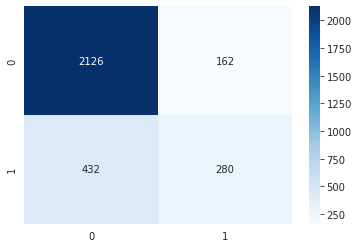

In [186]:
# your code here
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap='Blues', fmt='.4g');

<font color="blue">Additional explanation</font>

Or with explanatory labels as in the solution submitted by Baptiste Loutan.

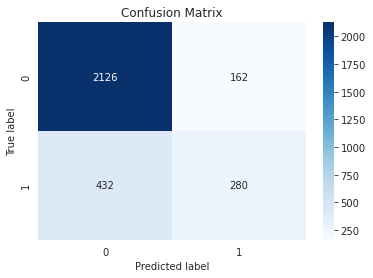

In [187]:
cf = confusion_matrix(y_test, y_pred)
plt.figure()
ax = plt.subplot()
r = sns.heatmap(cf, annot=True, fmt='g', ax=ax, cmap='Blues')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('Confusion Matrix');

### 4. Logistic Regression with Cross Validation (with Ordinal-Encoded Salary)
#### 4.1. One more time, set the y and X variables, this time using `oe_salary` instead of `le_salary`.

> Hint: X shoud contain the following 19 features 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spent_company', 'eval_spent','work_accident',
       'promotion_last_5years', ('IT',), ('RandD',), ('accounting',),
       ('hr',), ('management',), ('marketing',), ('product_mng',),
       ('sales',), ('support',), ('technical',), 'oe_salary'.

In [188]:
# your code here
y=data.left
X=data[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spent_company', 'eval_spent','work_accident',
       'promotion_last_5years', 'IT', 'RandD', 'accounting',
       'hr', 'management', 'marketing', 'product_mng',
       'sales', 'support', 'technical', 'oe_salary']]
X.head(1)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spent_company,eval_spent,work_accident,promotion_last_5years,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,oe_salary
0,0.38,0.53,2,157,3,1.59,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [189]:
X.shape

(14999, 19)


#### 4.2. Train/test splitting¶: Now split the data into 80% training and 20% test set. Remember to set the random seed to 72.


In [190]:
# your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

#### 4.3. Finally, train a Logistic Regression model with cross validation. Use the same parameters as before for Logistic RegressionCV. These are copied again below.

`LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000, random_state=72)`

In [191]:
# your code here
log_reg = LogisticRegressionCV(solver='lbfgs',cv=5, max_iter=1000, random_state=72)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

#### 4.4 What are accuracy, precision and recall on the test set?

In [192]:
# your code here
print(f"TEST ACCURACY SCORE:\n{accuracy_score(y_test, y_pred):.4f}")

TEST ACCURACY SCORE:
0.8207


In [193]:
# store for later
a2=accuracy_score(y_test, y_pred)

In [194]:
# your code here
precision_score(y_test, y_pred)

0.6641509433962264

In [195]:
# your code here
recall_score(y_test, y_pred)

0.4943820224719101

#### 4.5. Plot the confusion matrix.

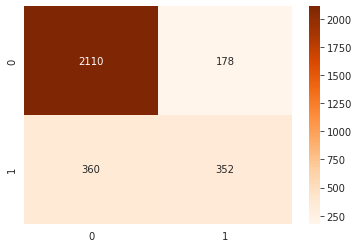

In [196]:
# your code here
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap='Oranges', fmt='.4g');

### 5. Logistic Regression with Standardisation and Cross Validation

Try to improve the previous model under point 4 (with `oe_salary`) using standardisation. 

#### 5.1. Standardize only these numerical features: `satisfaction_level`, `last_evaluation`, `number_project`, `average_monthly_hours`, `time_spent_company`, `eval_spent`, so that each have a mean of zero and a standard deviation of 1. You can use the Scikit-learn `StandardScaler` function.
> Hint: remember to use only the training set for fiting the StandardScaler, then apply the scaler (transform) to both the train and test sets.
>
> Hint 2: X shoud contain the following 19 features 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spent_company', 'eval_spent','work_accident',
       'promotion_last_5years', ('IT',), ('RandD',), ('accounting',),
       ('hr',), ('management',), ('marketing',), ('product_mng',),
       ('sales',), ('support',), ('technical',), 'oe_salary'.


In [197]:
X_train.head(1)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spent_company,eval_spent,work_accident,promotion_last_5years,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,oe_salary
5052,0.7,0.76,5,165,3,2.28,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1


In [198]:
# your code here
from sklearn.compose import ColumnTransformer

num_cols=['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'time_spent_company', 'eval_spent']
num_stand=StandardScaler()

preprocessor = ColumnTransformer([('standardization', num_stand, num_cols)], remainder='passthrough')
encodedX_train = preprocessor.fit_transform(X_train)
encodedX_train = pd.DataFrame(encodedX_train, columns=X_train.columns)
encodedX_train.head(1)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spent_company,eval_spent,work_accident,promotion_last_5years,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,oe_salary
0,0.350743,0.248421,0.96691,-0.725107,-0.346169,-0.201754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [199]:
encodedX_test = preprocessor.transform(X_test)
encodedX_test = pd.DataFrame(encodedX_test, columns=X_test.columns)
encodedX_test.head(1)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spent_company,eval_spent,work_accident,promotion_last_5years,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,oe_salary
0,-0.492753,0.715165,0.96691,-0.165045,-0.346169,-0.019648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


#### 5.2. Training

Train a Logistic Regression model with Cross Validation on the pre-processed dataset to which you applied standardisation. Use the same parameters for LogisticRegressionCV as before. These are copied below.

`LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000, random_state=72)`



In [200]:
# your code here
log_reg = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000, random_state=72)
log_reg.fit(encodedX_train, y_train)
y_pred = log_reg.predict(encodedX_test)

In [201]:
log_reg.coef_

array([[-1.10090893, -2.31402683, -0.34350518,  0.23526039, -3.92402839,
         5.20358217, -1.56132177, -2.11052273, -0.05388112, -0.34993374,
         0.12719226,  0.4028779 , -0.62946027,  0.08807818, -0.12175909,
         0.08448018,  0.16279673,  0.2129471 , -0.69024382]])

#### 5.3. What is the test accuracy? What is the train accuracy?

In [202]:
# your code here
print(f"TEST ACCURACY SCORE:\n{accuracy_score(y_test, y_pred):.4f}")

TEST ACCURACY SCORE:
0.8227


In [203]:
# store for later
a3=accuracy_score(y_test, y_pred)

In [204]:
# your code here
y_pred_t = log_reg.predict(encodedX_train)
print(f"TRAIN ACCURACY SCORE:\n{accuracy_score(y_train, y_pred_t):.4f}")

TRAIN ACCURACY SCORE:
0.8231


#### 5.4. Calculate the precision and recall on the test set.

In [205]:
# your code here
precision_score(y_test, y_pred)

0.6642335766423357

In [206]:
# your code here
recall_score(y_test, y_pred)

0.5112359550561798

#### 5.5. Show the confusion matrix for the test set

In [207]:
# your code here
confusion_matrix(y_test, y_pred)

array([[2104,  184],
       [ 348,  364]])

#### 5.6. Plot the confusion matrix

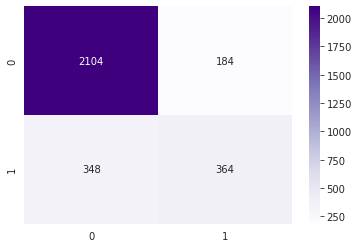

In [208]:
# your code here
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap='Purples', fmt='.4g');

#### 5.7. Use the logistic regression model with standardisation and cross validation to predict whether a employee with the following characteristics will stay on the job or leave:

> An employee from the sales department, low salary, satisfaction 0.43, last evaluation 0.97, involved in 6 projects, working 284 monthly hours, 4 years spent with the company, 0 work accident and 0 promotions in the last 5 years.

In [209]:
X_train.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spent_company', 'eval_spent',
       'work_accident', 'promotion_last_5years', 'IT', 'RandD', 'accounting',
       'hr', 'management', 'marketing', 'product_mng', 'sales', 'support',
       'technical', 'oe_salary'],
      dtype='object')

In [210]:
# these are the X-values for which you should make the prediction
X_new = pd.DataFrame({'satisfaction_level': 0.43, 'last_evaluation': 0.97, 'number_project': 6,
       'average_monthly_hours': 284, 'time_spent_company': 4, 'eval_spent': 3.88, 
       'work_accident': 0, 'promotion_last_5years': 0, 'IT': 0, 'RandD': 0, 'accounting': 0,
       'hr': 0, 'management': 0, 'marketing': 0, 'product_mng': 0,
       'sales': 1, 'support': 0, 'technical': 0, 'oe_salary': 0}, index=[0])
X_new

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spent_company,eval_spent,work_accident,promotion_last_5years,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,oe_salary
0,0.43,0.97,6,284,4,3.88,0,0,0,0,0,0,0,0,0,1,0,0,0


In [211]:
y_new_pred_probabilities = log_reg.predict_proba(preprocessor.transform(X_new))
y_new_pred_probabilities

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  "X does not have valid feature names, but"


array([[0.4917876, 0.5082124]])

In [212]:
y_new_pred = log_reg.predict(preprocessor.transform(X_new))
y_new_pred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  "X does not have valid feature names, but"


array([1])

### 6. KNN with standardisation

#### 6.1. Train a model using a K-Nearest Neighbours (KNN) algorithm, setting `knn = KNeighborsClassifier(n_neighbors=2)`. Use the same features as in the previous model (`oe_salary`) and standardisation.

> Hint: X shoud contain the following 19 features 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spent_company', 'eval_spent','work_accident',
       'promotion_last_5years', ('IT',), ('RandD',), ('accounting',),
       ('hr',), ('management',), ('marketing',), ('product_mng',),
       ('sales',), ('support',), ('technical',), 'oe_salary'.

In [213]:
# your code here
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(encodedX_train, y_train)
y_pred=knn.predict(encodedX_test)

#### 6.2. What is the train and test accuracy?

In [214]:
# your code here
print(f"TEST ACCURACY SCORE:\n{accuracy_score(y_test, y_pred):.4f}")

TEST ACCURACY SCORE:
0.9703


In [215]:
# store for later
a4=accuracy_score(y_test, y_pred)

In [216]:
# This is calculates the same test-accuracy as above
print(knn.score(encodedX_test, y_test))

0.9703333333333334


In [217]:
# your code here
print(knn.score(encodedX_train, y_train)) # train accuracy score

0.9924993749479123


#### 6.3. What is the precision and recall?

In [218]:
# your code here
precision_score(y_test, y_pred)

0.9431009957325747

In [219]:
# your code here
recall_score(y_test, y_pred)

0.9311797752808989

#### 6.4. Print and plot the confusion matrix

In [220]:
# your code here
confusion_matrix(y_test, y_pred)

array([[2248,   40],
       [  49,  663]])

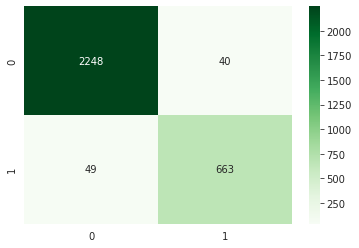

In [221]:
# your code here
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap='Greens', fmt='.4g');

<font color="blue">Additional explanation</font>

Code from Melinda Femminis for identifying false positives (cases when model predicts 1 but the true label is 0.

In [222]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
fp

40

#### 6.5. Use the K-Nearest Neighbours (KNN) model trained above to predict whether a employee with the characteristics outilined below will stay on the job. This is the same employee as before under point 5.7.

> An employee from the sales department, low salary, satisfaction 0.43, last evaluation 0.97, involved in 6 projects, working 284 monthly hours, 4 years spent with the company, 0 work accident and 0 promotions in the last 5 years. (same as before)
>
> Hint: do not forget to apply standardisation to the data for the new employee for which you want to make the prediction.

In [223]:
# these are the X-values for which you should make the prediction
X_new = pd.DataFrame({'satisfaction_level': 0.43, 'last_evaluation': 0.97, 'number_project': 6,
       'average_monthly_hours': 284, 'time_spent_company': 4, 'eval_spent': 3.88, 
       'work_accident': 0, 'promotion_last_5years': 0, 'IT': 0, 'RandD': 0, 'accounting': 0,
       'hr': 0, 'management': 0, 'marketing': 0, 'product_mng': 0,
       'sales': 1, 'support': 0, 'technical': 0, 'oe_salary': 0}, index=[0])
X_new

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spent_company,eval_spent,work_accident,promotion_last_5years,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,oe_salary
0,0.43,0.97,6,284,4,3.88,0,0,0,0,0,0,0,0,0,1,0,0,0


In [224]:
# your code here
preprocessor.transform(X_new)

array([[-0.73375148,  1.47362339,  1.77540856,  1.6551549 ,  0.34050343,
         1.01228422,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ]])

In [225]:
y_new=knn.predict(preprocessor.transform(X_new))
y_new

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])

In [226]:
knn.predict_proba(preprocessor.transform(X_new))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([[1., 0.]])

### 7. Decision Tree Classifier and Standardisation

#### 7.1. Use the same features as before (with `oe_salary`) and standardisation to train your model of emloyee retention. Use the following parameters for your decision tree: `DecisionTreeClassifier(max_depth=7, random_state=72)`

> Hint: X should have a total of 19 features, namely: 'satisfaction_level', 'last_evaluation',            'number_project', 'average_monthly_hours',           'time_spent_company',         'work_accident',       'promotion_last_5years',                 ('IT',),                   ('RandD',),         ('accounting',), ('hr',),         ('management',),  ('marketing',), ('product_mng',), ('sales',),            ('support',), ('technical',), 'le_salary', 'eval_spent'.


In [227]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
tree=DecisionTreeClassifier(max_depth=7, random_state=72)

In [228]:
# your code here
tree.fit(encodedX_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=72)

#### 7.2. Calculate the test and train accuracy.

In [229]:
# your code here
tree.score(encodedX_test, y_test)

0.9826666666666667

In [230]:
# store for later
a5=tree.score(encodedX_test, y_test)

In [231]:
# your code here
tree.score(encodedX_train, y_train)

0.9809984165347112

#### 7.3. Calculate precision and recall on the test set

In [232]:
y_pred=tree.predict(encodedX_test)

In [233]:
# your code here
precision_score(y_test, y_pred)

0.9925373134328358

In [234]:
# your code here
recall_score(y_test, y_pred)

0.9339887640449438

#### 7.4. Plot the confusion matrix

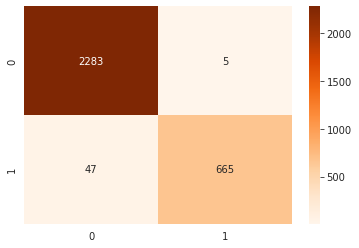

In [235]:
# your code here
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap='Oranges', fmt='.4g');

### 7. Accuracy improvement

Generate a plot with the different accuracy scores obtained for the different models trained.

In [236]:
# your code here
results = pd.DataFrame({'base_rate': base_rate, 'logreg le': a1, 
                        'logreg oe': a2, 'logreg s': a3,
                        'KNN': a4, 'decision tree': a5}, index=[0])
results

,base_rate,logreg le,logreg oe,logreg s,KNN,decision tree
0,0.762667,0.802,0.820667,0.822667,0.970333,0.982667


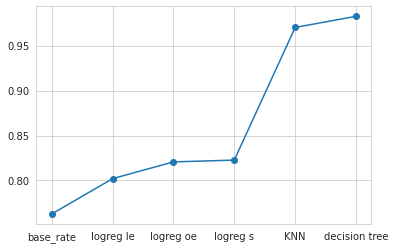

In [237]:
plt.plot(results.iloc[0], marker='o')

<font color="blue">Additional explanation</font>

Here we had a variety of final tables for the code, which is very nice. For inspiration, below you have the solution from Melinda Femminis.

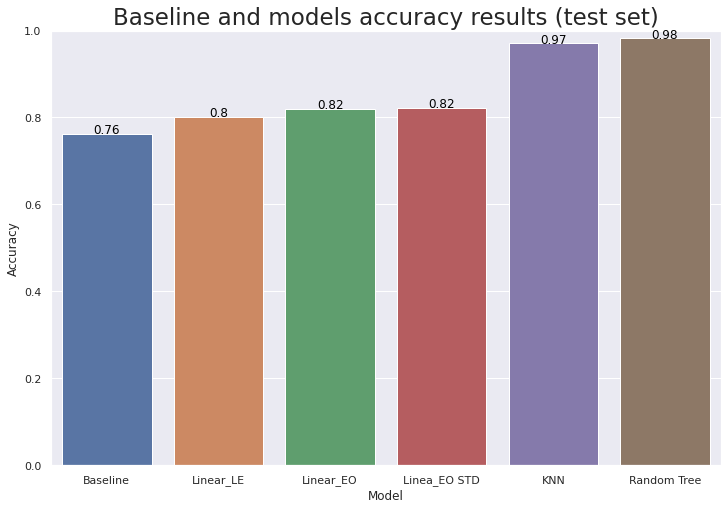

In [241]:
# Create df with accuracy results
accuracy_results = pd.DataFrame({'Model':  ['Baseline', 'Linear_LE', 'Linear_EO', 'Linea_EO STD', 'KNN', 'Random Tree'],
        'Accuracy': [base_rate, a1, a2, a3, a4, a5]
        })

# Set style and figure size
sns.set(rc = {'figure.figsize':(12,8)},)
sns.set_style('darkgrid')

# Create plot 
g = sns.barplot(x = 'Model', y = 'Accuracy',
            data = accuracy_results)
plt.ylim(0, 1)

# Add test
for index, row in accuracy_results.iterrows():
    g.text(row.name,row.Accuracy, round(row.Accuracy,2), color='black', ha="center")
g.set_title("Baseline and models accuracy results (test set)", fontsize = 23)
plt.show()